<center>
 <img ![image.png](attachment:image.png) />

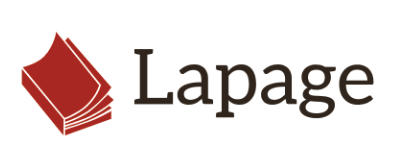

<h1><center> Analyse des ventes en ligne de la librairie

## Sommaire <a id="0"></a>


<div class="alert alert-block alert-info" style="margin-top: 10px">

I.  [Exploration et préparation des données](#1)<br>
II.  [Analyse des indicateurs de vente](#2)<br>
III.  [Analyse du comportement des clients en ligne](#3) <br>


</div>

In [2]:
# importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import kstwo
from scipy.stats import ks_2samp

In [3]:
# Importation des fichiers
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')


## I. Exploration et préparation des données <a id="1"></a>



I.1  [Exploration de la base clients](#4)<br>
    I.2  [Exploration de la base produits](#5)<br>
    I.3  [Exploration de la base transactions](#6) <br>
     I.4 [Analyse des écarts](#7) <br>
    I.5  [Synthèse et création de la base consolidée](#8) <br>



### I.1 Exploration du fichier clients <a id="4"></a>

In [4]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_2860,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [6]:
customers['sex'].value_counts().to_frame()

,sex
f,4491
m,4132


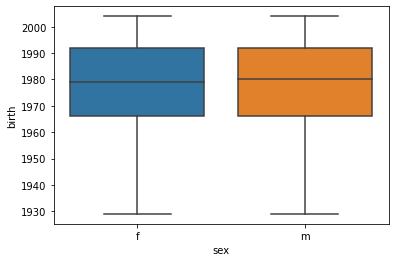

In [7]:

ax = sns.boxplot(x='sex', y="birth", data=customers)

<div 
    
[Retour au début de la section](#1)<br>

</div>

### Exploration de la base produits <a id="5"></a>

In [8]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


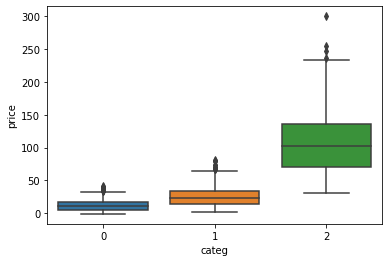

In [10]:
ax = sns.boxplot(x='categ', y="price", data=products)

In [11]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1272,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


<div class="alert alert-block alert-danger" >
  ❗  On remarque que le prix minimum est négatif.
</div>

Analysons plus en détail la variable prix pour voir comment traiter ces données.


In [12]:
products[products['price']<=0]

,id_prod,price,categ
731,T_0,-1.0,0


Nous remarquons qu'il n'ya qu'un seul produit "T_0" dont le prix est négatif.

<div 
    
[Retour au début de la section](#1)<br>

</div>

### Exploration de la base transactions <a id="6"></a>

In [13]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [15]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<div class="alert alert-block alert-danger" >
  ❗  On remarque qu'il y a des dates de test dans les données relatives aux transactions.
</div>

Ces données ne devraient pas être prises en compte dans l'analyse du chiffre d'affaires et des clients.
Analysons en détail ces données.


In [16]:
transactions['test_date']=transactions['date'].str.split('_').str[0]

In [17]:
display(transactions[transactions['test_date']=='test'].describe())

transactions[transactions['test_date']=='test'].head()

,id_prod,date,session_id,client_id,test_date
count,200,200,200,200,200
unique,1,39,1,2,1
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,test
freq,200,13,200,106,200


,id_prod,date,session_id,client_id,test_date
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,test
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,test
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,test
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,test
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,test


Tous les tests correspondent à la session_id "S_0" et au produit T_0 et aux clients ct_0 et ct_1

In [18]:
transactions[transactions['test_date']=='test']['date'].value_counts().to_frame()

,date
test_2021-03-01 02:30:02.237413,13
test_2021-03-01 02:30:02.237427,8
test_2021-03-01 02:30:02.237428,8
test_2021-03-01 02:30:02.237444,8
test_2021-03-01 02:30:02.237414,8
test_2021-03-01 02:30:02.237443,8
test_2021-03-01 02:30:02.237432,7
test_2021-03-01 02:30:02.237430,7
test_2021-03-01 02:30:02.237446,7
test_2021-03-01 02:30:02.237419,6


In [19]:
#creation d'un nouveau dataframe excluant les valeurs de test
transactions_clean=transactions[transactions['test_date']!='test'].drop('test_date', axis=1)

In [20]:
#conversion de la colonne date au format datetime.
transactions_clean['date']=pd.to_datetime(transactions_clean['date'], format="%Y/%m/%d")

In [21]:
transactions_clean.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<div 
    
[Retour au début de la section](#1)<br>

</div>

<a id="7"></a>

<div class="alert alert-block alert-danger" style="margin-top: 10px">
    
  <h3>Analyse des écarts  </h3>

- Il y a  8623 clients dans la base customers mais 8602 clients dans le fichier de transactions soit 21 clients d'écart. Nous devons réconcilier cet écart
    
- il y a 3287 produits dans le fichier products contre 3267 dans le fichier transactions, nous devons réconcilier cet écart.



</div>

In [22]:
#Analyse des écarts clients
client_not_in_transactions=[]
A=list(customers['client_id'])
B=list(transactions['client_id'].unique())
print('clients dans base customers mais pas dans transactions: ',len([c for c in A if c not in B]))
print('clients dans transactions mais pas dans base customers: ',len([c for c in B if c not in A]))

clients dans base customers mais pas dans transactions:  21
clients dans transactions mais pas dans base customers:  0


In [23]:
#Analyse des écarts de produits
product_not_in_transactions=[]
A=list(products['id_prod'])
B=list(transactions['id_prod'].unique())
print('produits dans base products mais pas dans transactions: ',len([p for p in A if p not in B]))
print('produits dans transactions mais pas dans base products: ',len([p for p in B if p not in A]),[p for p in B if p not in A] )

produits dans base products mais pas dans transactions:  21
produits dans transactions mais pas dans base products:  1 ['0_2245']


In [24]:
#nombre de transactions concernées par le produit '0_2245'
transactions[transactions['id_prod']=='0_2245']['session_id'].count()

221

In [25]:
#Liste des 21 produits non vendus
print(product_not_in_transactions)

[]


<div 
    
[Retour au début de la section](#1)<br>

</div>

<a id="8"></a>

<div class="alert alert-block alert-success" style="margin-top: 10px">
    
   <h3> I.5 Synthèse de l'exploration des données et choix retenus pour la base de données consolidée</h3>

- Il y a  21 clients qui n'ont jamais acheté en ligne. Ces clients ne seront pas retenus dans notre base consolidées car ils ne rentrent pas en compte dans l'analyse du CA en ligne.
    
- il y a 21 produits qui n'ont jamais été vendus en ligne sur 3287 produits dans la base products, soit moins de 0.7%. Ceux ci n'impacte pas l'analyse des ventes en ligne. Nous exclurons ces produits de notre base de données consolidées et communiquerons la liste de ces 21 produits au management.

- il y a un produit "0_2245" qui apparait dans les transactions mais pas dans le fichier produits. Ce produit correspond à 221 transactions soit environs 0,03%. L'impact étant totalement négligeable nous mettrons le prix de ces produits à zéro et la catégorie à 0.

- Une session de tests a été réalisée le 01 mars 2021, les client ct_0 et ct_1 sont des clients-tests ansi que le produit T_0, ces données ne sont pas retenus dans notre base consolidée.

</div>

In [26]:
#creation d'un dataframe excluant le produit T_0 de la base produits.
products_clean=products[products['id_prod']!='T_0']

In [27]:
# Création d'une base de données consolidée.
base_globale=transactions_clean.merge(products_clean,how='left').merge(customers, how='left')

In [28]:
#traitement des valeurs nulles
base_globale.loc[base_globale['id_prod']=='0_2245','price']=0
base_globale.loc[base_globale['id_prod']=='0_2245','categ']=0

In [29]:
#creation de colonnes identifiant les données relatives au même mois et au même exercice pour faciliter l'analyse future.
mois=base_globale.groupby(pd.Grouper(key='date',freq='M')).sum().reset_index()['date']
base_globale['month']=base_globale["date"].map(lambda x: x.month)
base_globale["end month"]=base_globale["date"].map(lambda x: str(x.month)+'-'+str(x.year))
base_globale.loc[(base_globale['date']<=mois[11]),'year']='2021-2022'
base_globale.loc[(base_globale['date']>mois[11]),'year']='2022-2023'

#Ajout d'une colonne age pour faciliter l'analyse
base_globale["age"]=2023-base_globale['birth']
base_globale.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,month,end month,year,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,5,5-2022,2022-2023,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2,2-2022,2021-2022,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,6,6-2022,2022-2023,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,6,6-2021,2021-2022,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,1,1-2023,2022-2023,43


In [30]:
base_globale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   month       679332 non-null  int64         
 9   end month   679332 non-null  object        
 10  year        679332 non-null  object        
 11  age         679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 67.4+ MB


In [31]:
base_globale.describe(include='all', datetime_is_numeric=True)

,id_prod,date,session_id,client_id,price,categ,sex,birth,month,end month,year,age
count,679332,679332,679332,679332,679332.000000,679332.000000,679332,679332.000000,679332.000000,679332,679332,679332.000000
unique,3266,NaN,342315,8600,NaN,NaN,2,NaN,NaN,24,2,NaN
top,1_369,NaN,s_118668,c_1609,NaN,NaN,m,NaN,NaN,9-2021,2022-2023,NaN
freq,2252,NaN,14,25488,NaN,NaN,340930,NaN,NaN,33326,343093,NaN
mean,NaN,2022-03-03 15:13:19.307411712,NaN,NaN,17.449095,0.441809,NaN,1977.811139,6.504354,NaN,NaN,45.188861
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN,0.000000,0.000000,NaN,1929.000000,1.000000,NaN,NaN,19.000000
25%,NaN,2021-09-08 09:14:25.055994368,NaN,NaN,8.820000,0.000000,NaN,1970.000000,3.000000,NaN,NaN,36.000000
50%,NaN,2022-03-03 07:50:20.817730560,NaN,NaN,13.990000,0.000000,NaN,1980.000000,6.000000,NaN,NaN,43.000000
75%,NaN,2022-08-30 23:57:08.555173888,NaN,NaN,18.990000,1.000000,NaN,1987.000000,9.000000,NaN,NaN,53.000000
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN,300.000000,2.000000,NaN,2004.000000,12.000000,NaN,NaN,94.000000


<div 
    
[Retour au début de la section](#1)<br>

</div>

<div 
    
[Retour au sommaire](#0)<br>

</div>

## II. Analyse des indicateurs de vente <a id="2"></a>



II.1  [Evolution des ventes dans le temps](#9)<br>
    II.2  [Analyse des ventes par catégorie de produit](#10)<br>
    II.3  [Profils clients et répartition du CA entre les clients](#11) <br>
     




### II.1  Evolution du CA dans le temps <a id="9"></a>

#### II.1.a) Vue d'ensemble et évolution des ventes mensuelles

In [32]:
#Calcul du CA et du volume des ventes par année.
CA_21=base_globale.loc[base_globale['year']=="2021-2022"]['price'].sum()
volume_21= base_globale.loc[base_globale['year']=="2021-2022"]['price'].count()
CA_22=base_globale.loc[base_globale['year']=="2022-2023"]['price'].sum()
volume_22= base_globale.loc[base_globale['year']=="2022-2023"]['price'].count()
print("Le chiffre d'affaires en ligne de l'exercice 21-22 s'élève à {:,.2f} euros pour un volume de ventes de {:,} livres.".format(CA_21,volume_21))
print("Le chiffre d'affaires en ligne de l'exercice 22-23 s'élève à {:,.2f} euros pour un volume de ventes de {:,} livres.".format(CA_22,volume_22))
print("La progression des ventes est de {:,.2f}% en valeur et de {:,.2f}% en volume'".format(((CA_22-CA_21)/CA_21*100),((volume_22-volume_21)/volume_21)*100))

Le chiffre d'affaires en ligne de l'exercice 21-22 s'élève à 5,812,878.78 euros pour un volume de ventes de 336,239 livres.
Le chiffre d'affaires en ligne de l'exercice 22-23 s'élève à 6,040,849.90 euros pour un volume de ventes de 343,093 livres.
La progression des ventes est de 3.92% en valeur et de 2.04% en volume'


In [33]:
CA_mensuel=base_globale[['year', 'month','price']].groupby(['year','month']).sum('price').reset_index()
CA_mensuel.head()

,year,month,price
0,2021-2022,1,525338.99
1,2021-2022,2,516713.23
2,2021-2022,3,482440.61
3,2021-2022,4,476109.30
4,2021-2022,5,492943.47


In [34]:
# CA mensuel
CA_mensuel=base_globale[['year', 'month','price']].groupby(['year','month']).sum('price').reset_index()
CA_mensuel.columns=['année','Mois','CA mensuel']
# Volume mensuel
V_mensuel=base_globale[['year', 'month','price']].groupby(['year','month']).count().reset_index()
V_mensuel.columns=['année','Mois','Volume mensuel']

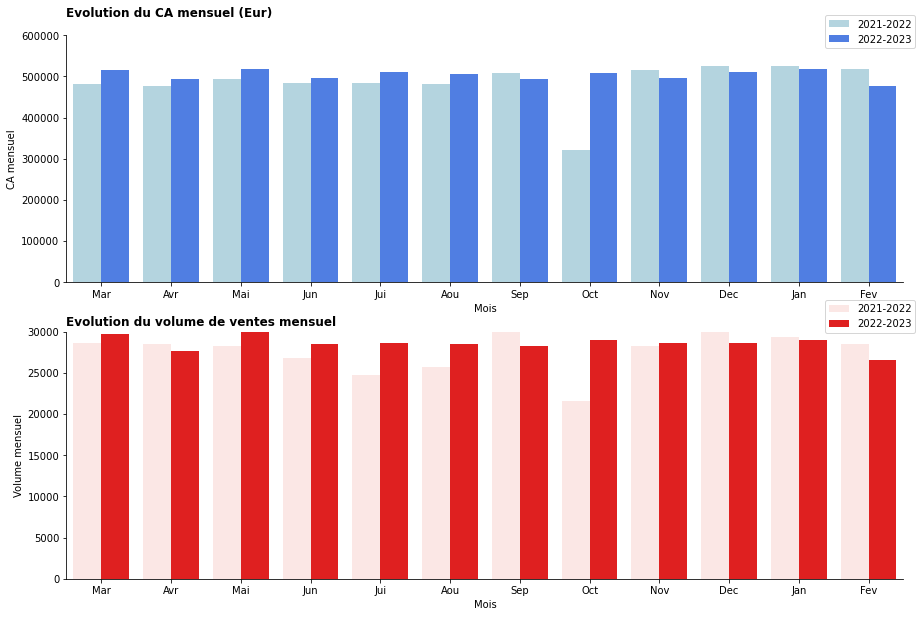

In [35]:
#Evolution des ventes mensuelles en valeur et en volumes
mois_lettres=['Mar', 'Avr', 'Mai','Jun', 'Jui', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec','Jan','Fev']
fig0, (ax0, ax1) =plt.subplots(2,1,figsize=(15,10))
sns.barplot(x='Mois',y='CA mensuel', data=CA_mensuel, hue='année' ,palette=["lightblue","#3875FA"], ax=ax0,order=[3,4,5,6,7,8,9,10,11,12,1,2])
ax0.set_xticklabels(mois_lettres)
ax0.set_ylim(top=600000)
ax0.legend(loc='upper left',bbox_to_anchor=(0.9, 1.1))
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_title("Evolution du CA mensuel (Eur)" , weight="bold", loc='left', y=1.05)

sns.barplot(x='Mois',y='Volume mensuel', data=V_mensuel, hue='année' , ax=ax1 ,order=[3,4,5,6,7,8,9,10,11,12,1,2], palette=["mistyrose","Red"])
ax1.set_xticklabels(mois_lettres)
ax1.set_ylim(top=30000)
ax1.legend(loc='upper left',bbox_to_anchor=(0.9, 1.15))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Evolution du volume de ventes mensuel" , weight="bold", loc='left', y=1)

plt.show()

<div class="alert alert-block alert-success" style="margin-top: 10px">
Bien que le total des ventes ait augmentés en valeur et en volume pendant l'exercice 2022-2023  on voit un ralentissement du volume des ventes sur le dernier trimestre de l'exercice 2022-2023 qui se traduit par une baisse du CA trimestriel.
    
On remarque également un gap dans les ventes en octobre à expliquer.

#### II.1.b ) Analyse des ventes journalières dans le temps

In [36]:
# CA par jour et moyenne mobile
CA_jour=base_globale[["date",'price']].groupby(pd.Grouper(key='date',freq='d')).sum().reset_index()
CA_jour.columns=['date','CA jour']
CA_jour['Moyenne Mobile']=CA_jour['CA jour'].rolling(7).mean()
CA_jour.loc[CA_jour['Moyenne Mobile'].isnull(), 'Moyenne Mobile']=0

In [37]:
# Volume des ventes par jour et moyenne mobile
volume_jour=base_globale[["date",'id_prod']].groupby(pd.Grouper(key='date',freq='d')).count().reset_index()
volume_jour.columns=['date','Volume jour']
volume_jour['Moyenne Mobile']=volume_jour['Volume jour'].rolling(7).mean()
volume_jour.loc[volume_jour['Moyenne Mobile'].isnull(), 'Moyenne Mobile']=0

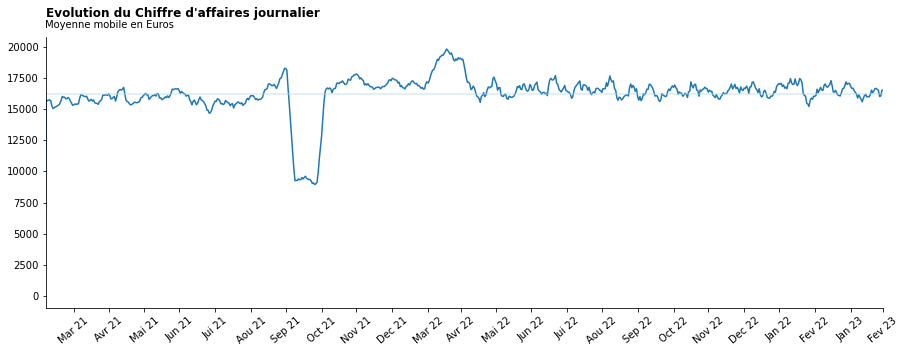

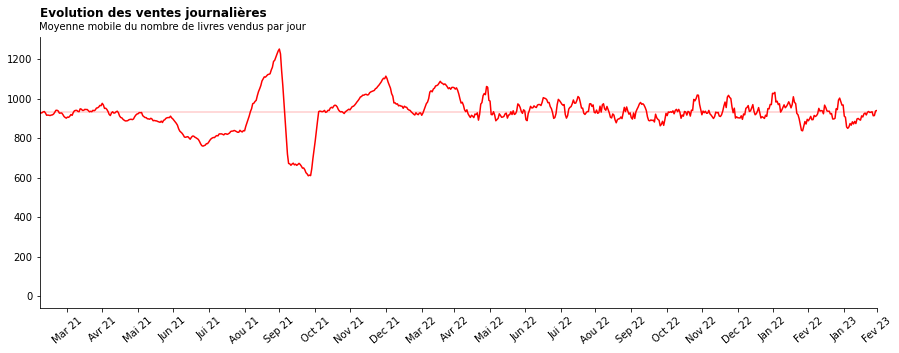

In [38]:
mois_21=pd.Series(mois_lettres[0:-2]).map(lambda x: x+' 21')
mois_22=pd.Series(mois_lettres).map(lambda x: x+' 22')
mois_23=pd.Series(mois_lettres[-2:]).map(lambda x: x + ' 23')
mois_labels=list(mois_21.append(mois_22[:-2]).append(mois_22[-2:]).append(mois_23))

# Evolution des ventes journalières
fig2, ax2=plt.subplots(figsize=(15,5))

ax2.plot(CA_jour["date"],CA_jour['Moyenne Mobile'])
ax2.set_title("Evolution du Chiffre d'affaires journalier" , weight="bold", loc='left', y=1.05)
ax2.text(s="Moyenne mobile en Euros", y=21500, x='2021-03-06')
ax2.set_xlim(left="2021-03-07",right="2023-02-28")
ax2.set_xticks(mois)
ax2.set_xticklabels(mois_labels, rotation=40)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axhline(y=CA_jour['CA jour'].mean(), c='lightblue', alpha=0.5)

fig3, ax3=plt.subplots(figsize=(15,5))

ax3.plot(volume_jour["date"],volume_jour['Moyenne Mobile'], color='red')
ax3.set_title("Evolution des ventes journalières" , weight="bold", loc='left', y=1.05)
ax3.text(s="Moyenne mobile du nombre de livres vendus par jour", y=1350, x='2021-03-06')
ax3.set_xticks(mois)
ax3.set_xticklabels(mois_labels, rotation=40)
ax3.set_xlim(left="2021-03-07",right="2023-02-28")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.axhline(y=volume_jour['Volume jour'].mean(), c='red', alpha=0.2)


plt.show()

<div class="alert alert-block alert-success" style="margin-top: 10px">

On remarque de façon beaucoup plus flagrante le gap dans les ventes en octobre.    
    On distingue trois pics dans le volume des ventes journalières en Août 21, Décembre 21 et Avril 22 mais ceux-ci ne se traduisent pas de la même manière en terme de chiffre d'affaires. Seule le pic d'avril correspond à une augmentation très significative du CA.


#### II.1.c)  Analyse de la dispersion des ventes journalières dans le temps

In [39]:
CA_jour_mois=base_globale.groupby(['year','month',pd.Grouper(key='date',freq='d')]).sum('price').reset_index()
V_jour_mois=base_globale.groupby(['year','month',pd.Grouper(key='date',freq='d')]).count().reset_index()


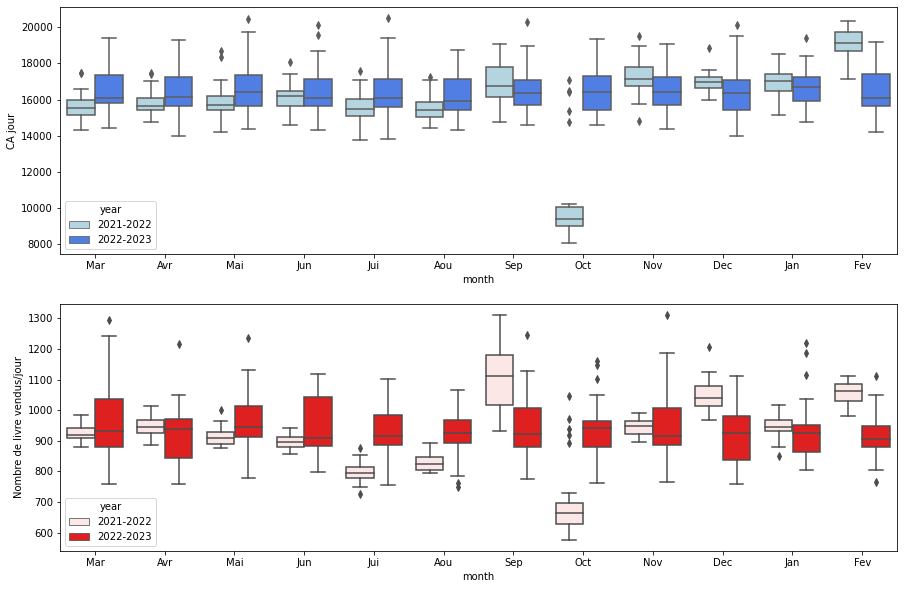

In [40]:
fig4, (ax4, ax5) =plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x="month", y="price", hue='year', ax=ax4,data=CA_jour_mois,order=[3,4,5,6,7,8,9,10,11,12,1,2],palette=["lightblue","#3875FA"])
ax4.set_xticklabels(mois_lettres)
ax4.set_ylabel("CA jour")
sns.boxplot(x="month", y="price", hue='year', ax=ax5,data=V_jour_mois,order=[3,4,5,6,7,8,9,10,11,12,1,2],palette=["mistyrose","Red"])
ax5.set_xticklabels(mois_lettres)
ax5.set_ylabel("Nombre de livre vendus/jour")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 10px">

Les ventes présentent une plus grande dispersion sur l'exercice 2022-2023 par rapport à l'exercice 2021-2022


<div 
    
[Retour au début de la section](#2)<br>

</div>

### II.2 Analyse des ventes par produits <a id="10"></a>

#### II.2.a) Vue d'ensemble et évolution des ventes par catégorie de produits

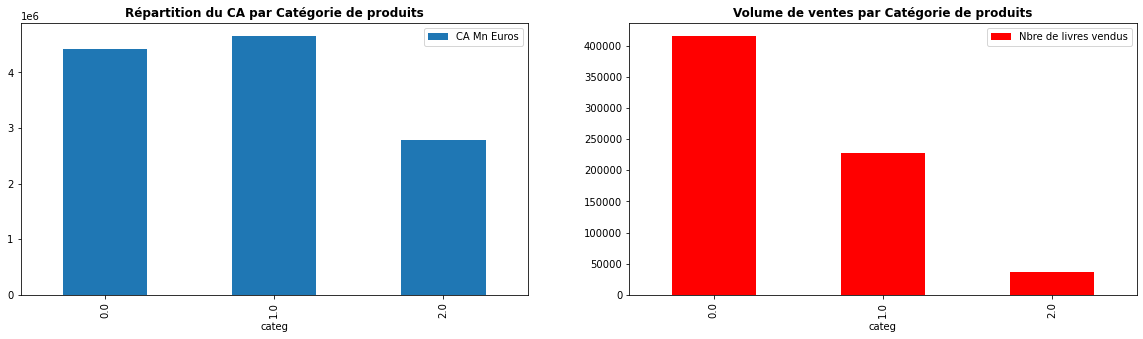

In [41]:
# Vue d'ensemble
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
base_globale.groupby('categ')['price'].sum().plot.bar()
plt.legend(['CA Mn Euros'])
plt.title("Répartition du CA par Catégorie de produits",weight="bold")
plt.subplot(1,2,2)
base_globale.groupby('categ')['id_prod'].count().plot.bar(color='red')
plt.title("Volume de ventes par Catégorie de produits", weight="bold")
plt.legend(['Nbre de livres vendus'])
plt.show()

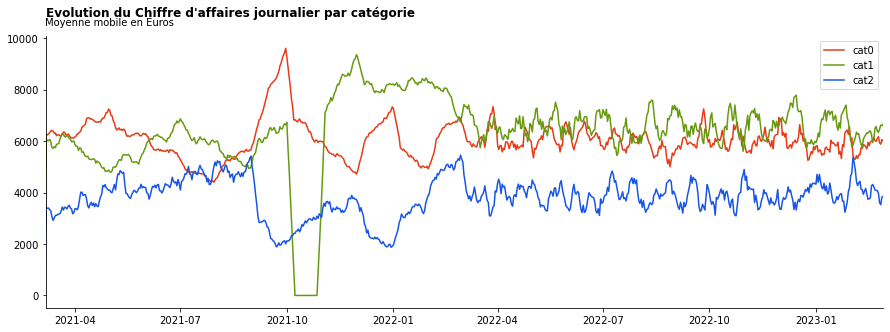

In [42]:
# CA journalier par categorie (moyenne mobile)
fig, ax3=plt.subplots(figsize=(15,5))

for categorie, c in zip([0, 1, 2],["#E63B17", '#67990F', '#1755E6']):
    CA_jour_cat=base_globale.loc[base_globale['categ']==categorie,["date",'price']].groupby(pd.Grouper(key='date',freq='d')).sum().reset_index()
    CA_jour_cat.columns=['date','CA jour']
    CA_jour_cat['Moyenne Mobile']=CA_jour_cat['CA jour'].rolling(7).mean()
    CA_jour_cat.loc[CA_jour_cat['Moyenne Mobile'].isnull(), 'Moyenne Mobile']=0
    ax3.plot(CA_jour_cat["date"],CA_jour_cat['Moyenne Mobile'], color=c)
    

ax3.legend(['cat0', 'cat1', 'cat2'])
ax3.set_title("Evolution du Chiffre d'affaires journalier par catégorie" , weight="bold", loc='left', y=1.05)
ax3.text(s="Moyenne mobile en Euros", y=10500, x='2021-03-06')
ax3.set_xlim(left="2021-03-07",right="2023-02-28")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


In [43]:
CA_jour_cat=base_globale.groupby([pd.Grouper(key='date',freq='d'),'year','month','categ']).sum().reset_index()

In [44]:
#identification précise du gap sur la catégorie 1
CA_jour_cat[(CA_jour_cat['categ']==1) & (CA_jour_cat["month"]==10) & (CA_jour_cat['year']=="2021-2022")]

,date,year,month,categ,price,birth,age
643,2021-10-01,2021-2022,10,1.0,7003.79,678708,17204
698,2021-10-28,2021-2022,10,1.0,6317.99,623714,15554
701,2021-10-29,2021-2022,10,1.0,6425.18,643739,15759
704,2021-10-30,2021-2022,10,1.0,6753.69,667415,16359
707,2021-10-31,2021-2022,10,1.0,7261.67,675492,16374


#### II.2.c)  Analyse de la dispersion des ventes par catégorie dans le temps

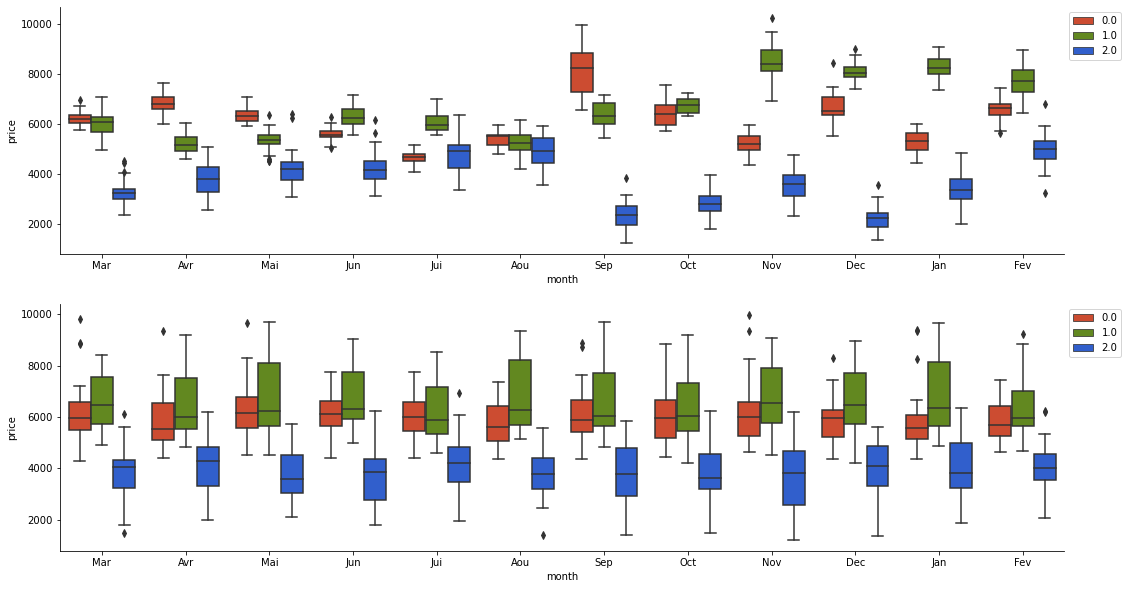

In [45]:
fig4, (ax4, ax5) =plt.subplots(2,1,figsize=(18,10))
sns.boxplot(x="month", y="price", data=CA_jour_cat[CA_jour_cat['year']=="2021-2022"],hue='categ',order=[3,4,5,6,7,8,9,10,11,12,1,2], ax=ax4, palette=["#E63B17", '#67990F', '#1755E6'])
ax4.set_xticklabels(mois_lettres)
ax4.legend(loc='upper left',bbox_to_anchor=(1, 1))
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
sns.boxplot(x="month", y="price", hue='categ', ax=ax5,data=CA_jour_cat[CA_jour_cat['year']=="2022-2023"],order=[3,4,5,6,7,8,9,10,11,12,1,2],palette=["#E63B17", '#67990F', '#1755E6'])
ax5.set_xticklabels(mois_lettres)
ax5.legend(loc='upper left',bbox_to_anchor=(1, 1))
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
plt.show()

#### II.2.d)  Analyse de la composition des ventes en fonction des prix des produits

In [46]:
top_ventes=base_globale.groupby(['id_prod', 'categ','price']).count()['date'].sort_values(ascending=False).to_frame().reset_index()
top_ventes.rename(columns={'date':'nbre ventes'}, inplace=True)
top_ventes['CA']=top_ventes["price"]*top_ventes['nbre ventes']
top_ventes["produit-cat"]=top_ventes['id_prod']+top_ventes['categ'].map({0: " - cat0",1:' - cat1', 2:' - cat2' })

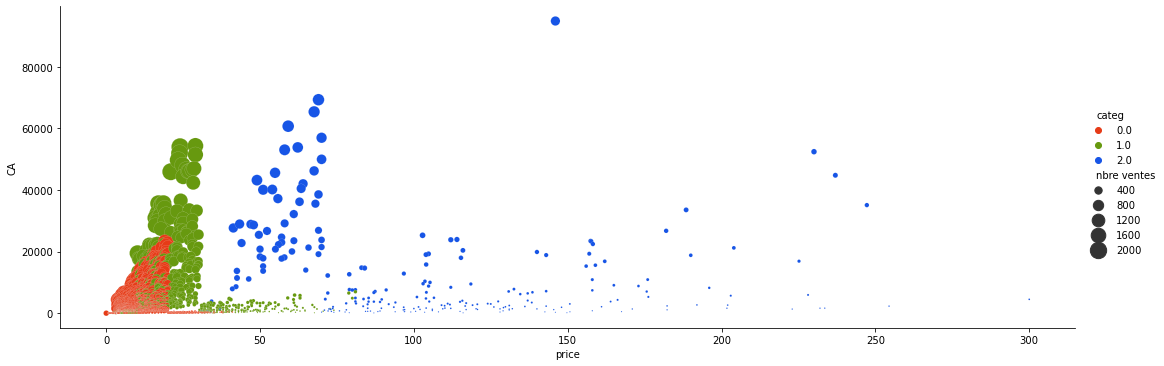

In [47]:
sns.relplot(data=top_ventes, x='price', y='CA',hue="categ", size='nbre ventes',sizes=(1,300),aspect=3, height=5, palette=["#E63B17", '#67990F', '#1755E6'])
plt.show()

#### II.2.e) Tops et flops des produits

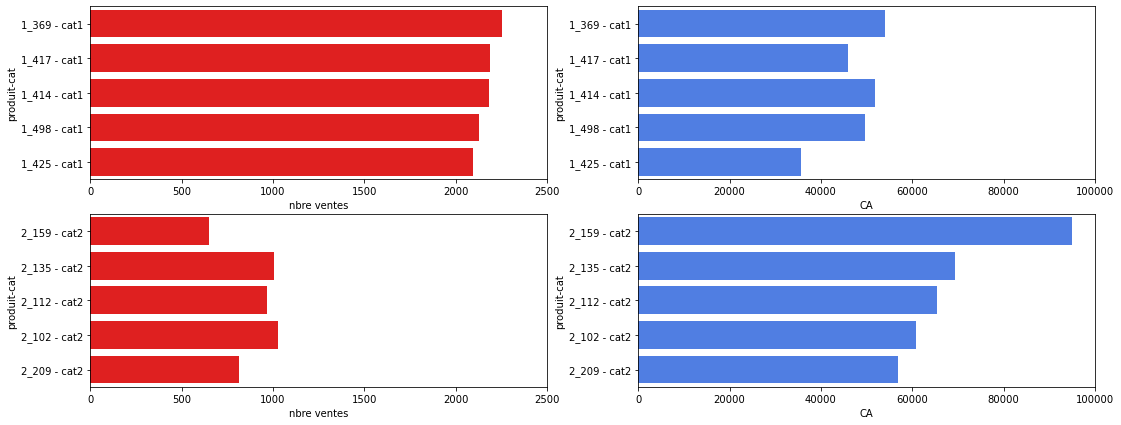

In [48]:
# produits les plus vendus en volume et en valeur
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(18,7))
sns.barplot(y='produit-cat',x='nbre ventes', data=top_ventes.head() ,palette= ["red"], orient='h', ax=ax1)
sns.barplot(y='produit-cat',x='CA', data=top_ventes.head() ,color="#3875FA", orient='h', ax=ax2)
sns.barplot(y='produit-cat',x='nbre ventes', data=top_ventes.sort_values('CA', ascending=False).head() ,color="red", orient='h', ax=ax3)
sns.barplot(y='produit-cat',x='CA', data=top_ventes.sort_values('CA', ascending=False).head() ,color="#3875FA", orient='h', ax=ax4)
ax1.set_xlim(right=2500)
ax2.set_xlim(right=100000)
ax3.set_xlim(right=2500)
ax4.set_xlim(right=100000)
plt.show()

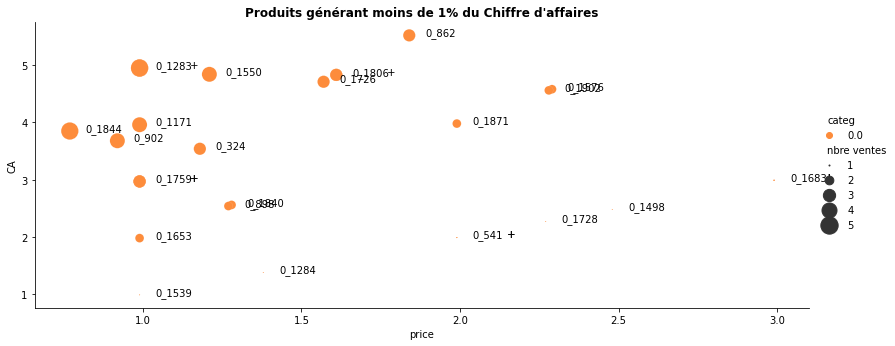

In [49]:
#produits qui rapportent le moins de CA

flop_ventes=top_ventes[top_ventes['CA']<top_ventes['CA'].quantile(0.01)].sort_values('CA', ascending=False)[:-1]
sns.relplot(data=flop_ventes, x='price', y='CA',hue="categ", size='nbre ventes',sizes=(1,300),aspect=2.5, height=4.5, palette='Oranges')

# label points on the plot
y_1=0
for x, y ,z in zip(flop_ventes['price'], flop_ventes['CA'], flop_ventes['id_prod']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    if y_1!=y :
        plt.text(x = x+0.05, # x-coordinate position of data label
        y = y, # y-coordinate position of data label
        s = z) # data label
    else :
        plt.text(x = x+0.15, # x-coordinate position of data label
        y = y, # y-coordinate position of data label
        s = ' +') # data label
    y_1=y
plt.title("Produits générant moins de 1% du Chiffre d'affaires",weight="bold")
plt.show()

<div 
    
[Retour au début de la section](#2)<br>

</div>

### II.3 Profils clients et répartition du CA entre les clients <a id="11"></a>

In [50]:
#dataframe calculant le CA par client et par année
volume_par_client=base_globale.groupby(['year','client_id','sex','age'])['id_prod'].count().to_frame().reset_index()
ventes_par_client=base_globale.groupby(['year','client_id','sex','age'])['price'].sum().to_frame().reset_index()
ca_client=volume_par_client.merge(ventes_par_client).rename(columns={"id_prod":"volume","price":"CA client"}).sort_values("volume", ascending=False)
ca_client['% CA']=ca_client['CA client']/(ca_client['CA client'].sum())*100
ca_client['% Volume']=ca_client['volume']/ca_client['volume'].sum()*100


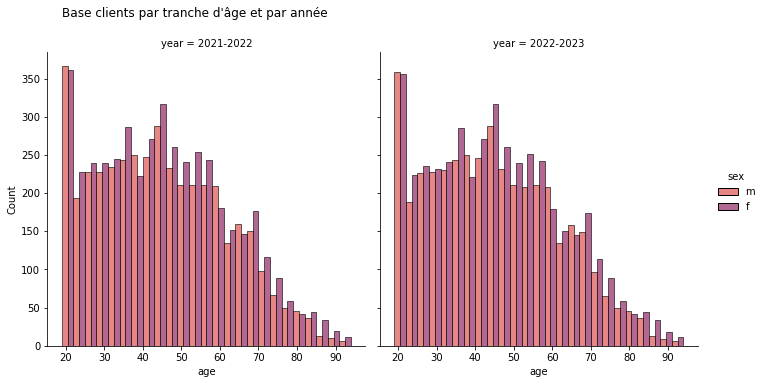

In [51]:
sns.displot(ca_client, x='age', hue='sex', multiple='dodge', palette='flare', stat='count', bins=25, col='year')
plt.title("Base clients par tranche d'âge et par année", loc="left", x=-1, y=1.1)
plt.show()

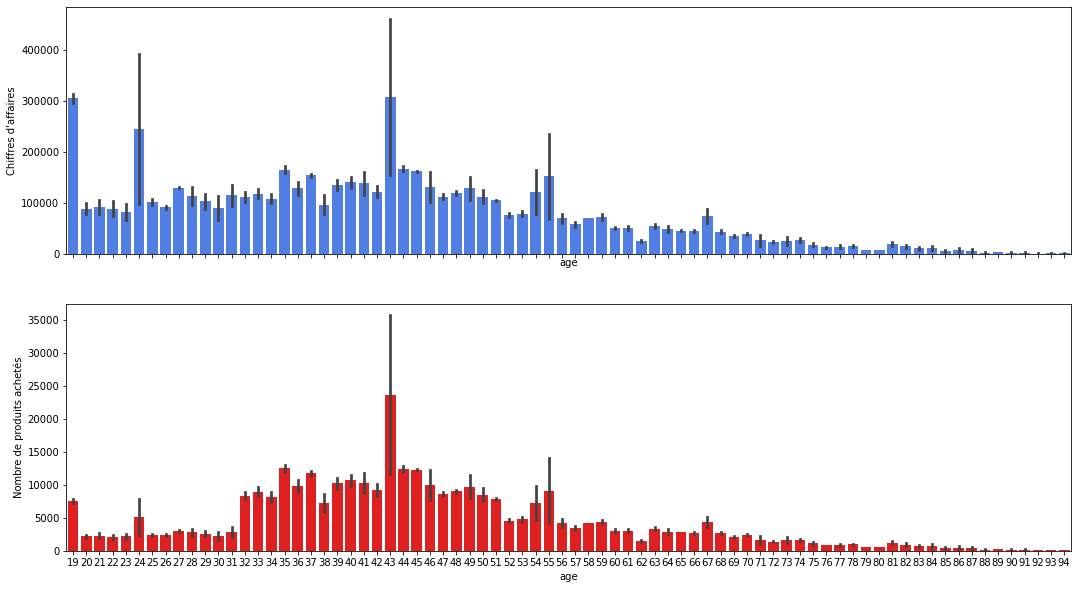

In [52]:
# répartition du CA par tranche d'age en volume et en valeur
freq_age=base_globale[['age','sex','id_prod']].groupby(['age','sex']).count().reset_index()
montant_age=base_globale[['age','sex','price']].groupby(['age', 'sex']).sum('price').reset_index()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
sns.barplot( data=freq_age,x="age", y='id_prod',ax=ax2, color="red")
ax2.set_ylabel("Nombre de produits achetés")
sns.barplot( data=montant_age,x="age", y='price',ax=ax1, color= "#3875FA")
ax1.set_ylabel("Chiffres d'affaires")
plt.show()



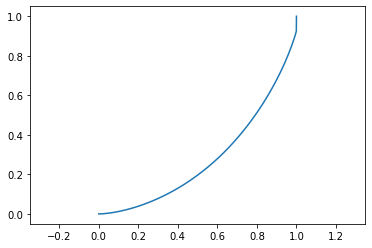

In [53]:
#concentration du CA entre les clients
ca_lorenz=ca_client["CA client"].values
n = len(ca_lorenz)
lorenz = np.cumsum(np.sort(ca_lorenz)) / ca_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()


on voit que le CA est relativement peu concentré et plutôt bien réparti entre les clients. La courbe est relativement proche de la diagonale y=x

<div 
    
[Retour au début de la section](#2)<br>

</div>

<div 
    
[Retour au sommaire](#0)<br>

</div>

## II. Analyse du comportement des clients en ligne  <a id="3"></a>

II.1  [Lien entre genre et catégories](#12)<br>
    II.2  [Lien entre âge et montant, fréquence des achats, panier moyen et catégories](#13)<br>
    II.3  [Probabilité conditionnelle un client achète 0_525 sachant qu'il a acheté 2_159](#14) <br>
    



### II.1 Lien entre le genre des clients et les catégories de livres achetés <a id="12"></a>

Nous allons effectuer un test d'indépendance du Chi-2 pour évaluer si ces deux variables qualitatives sont indépendantes.

L'hypothèse H0 est : les variables sexe et catégories sont indépendantes 


In [54]:
# table de contigence
contingency_tab=pd.crosstab(base_globale['categ'],base_globale['sex'])
contingency_tab.loc['total','f']=contingency_tab['f'].sum()
contingency_tab.loc['total','m']=contingency_tab['m'].sum()
contingency_tab['total']=contingency_tab['f']+contingency_tab['m']
contingency_tab

sex,f,m,total
categ,,,
0.0,206220.0,209460.0,415680.0
1.0,114899.0,112270.0,227169.0
2.0,17283.0,19200.0,36483.0
total,338402.0,340930.0,679332.0


In [55]:
chi2,p_value,dof,expected_freq=chi2_contingency(contingency_tab.iloc[0:3,0:2])

In [56]:
print(chi2, p_value)

147.00253568681114 1.1989607410166063e-32


<div class="alert alert-block alert-success" style="margin-top: 10px">

Le résultat du test et la p_value nous indiquent que nous pouvons rejeter l'hypothèse H0 selon laquelle les variables seraient indépendentes à un niveau de confiance à plus de 99%.


In [57]:
odds_tab=contingency_tab.iloc[:,0:2]
odds_tab['f']=contingency_tab.iloc[:,0]/contingency_tab.iloc[3,0]
odds_tab['m']=contingency_tab.iloc[:,1]/contingency_tab.iloc[3,1]
odds_tab['odds ratio (f versus m)']=odds_tab['f']/odds_tab['m']
odds_tab

sex,f,m,odds ratio (f versus m)
categ,,,
0.0,0.609394,0.614378,0.991887
1.0,0.339534,0.329305,1.031062
2.0,0.051072,0.056317,0.906881
total,1.000000,1.000000,1.000000


<div class="alert alert-block alert-success" style="margin-top: 10px">

L'analyse du odds ratio indique qu'une femme à :
-  3% de chance de plus qu'un homme d'acheter la catégorie 1
- 10% de chance de moins qu'un homme d'acheter la catégorie 2

Il n'y a pas de différence signigicative (0.1%) entre les femmes et les hommes en ce qui concerne la catégorie 0.


<div 
    
[Retour au début de la section](#3)<br>

</div>

### II.2  Lien entre l'âge... <a id="13"></a>



#### II.2. a)  Lien entre l'âge montant et fréquence des achats



In [58]:
#nombre de sessions par clients pour avoir la fréquence d'achats
session_client=base_globale.groupby(['client_id','age', 'session_id'])['id_prod'].count().to_frame().reset_index()
session_client=session_client.groupby(['client_id','age'])['session_id'].count().to_frame().reset_index()
session_client.rename(columns={'session_id':'freq achats'}, inplace=True)

In [59]:
# calcul des coefficient de corrélation
coeff_m=ca_client[["age", "CA client","volume"]].corr().iloc[0,1]
coeff_v=ca_client[["age", "CA client","volume"]].corr().iloc[0,2]
coeff_f=session_client[["age", "freq achats"]].corr().iloc[0,1]


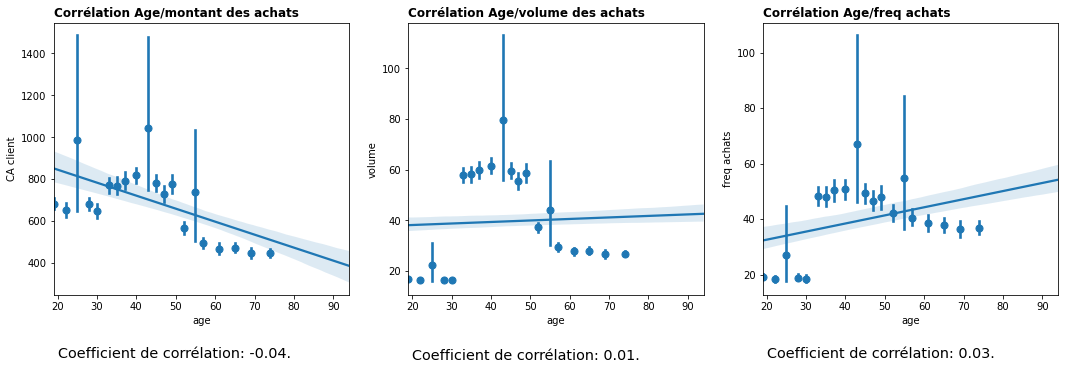

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(data=ca_client, x_bins=20, x="age", y="CA client", ax=ax1)
ax1.set_title("Corrélation Age/montant des achats", loc="left", x=0, y=1,weight="bold")
ax1.text(s="Coefficient de corrélation: {:,.2f}.".format(coeff_m), y=-50, x=20,size='x-large')
sns.regplot(data=ca_client, x_bins=20, x="age", y="volume", ax=ax2)
ax2.set_title("Corrélation Age/volume des achats", loc="left", x=0, y=1,weight="bold")
ax2.text(s="Coefficient de corrélation: {:,.2f}.".format(coeff_v), y=-15, x=20,size='x-large')
sns.regplot(data=session_client, x_bins=20, x="age", y="freq achats", ax=ax3)
ax3.text(s="Coefficient de corrélation: {:,.2f}.".format(coeff_f), y=-10, x=20, size='x-large')
ax3.set_title("Corrélation Age/freq achats", loc="left", x=0, y=1, weight="bold")
plt.show()


#### II.2.b lien entre âge et panier moyen

In [61]:
base_panier=base_globale[['session_id', 'price','age']].groupby(['session_id','age']).sum('price').reset_index()
base_panier.loc[base_panier['age']<32,'tranche age']='18-31'
base_panier.loc[(base_panier['age']<52) & (base_panier['age']> 31) ,'tranche age']='32-51'
base_panier.loc[(base_panier['age']<72) & (base_panier['age']> 51) ,'tranche age']='52-71'
base_panier.loc[ base_panier['age']> 71 ,'tranche age']='72+'

coefficient de corrélation: -0.3304907519219498


<AxesSubplot:xlabel='age', ylabel='price'>

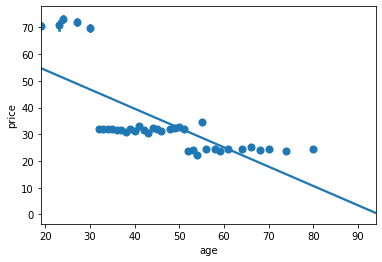

In [139]:
print('coefficient de corrélation:', base_panier[['age', 'price']].corr().iloc[0,1])
sns.regplot(data=base_panier, x_bins=40, x="age", y="price")

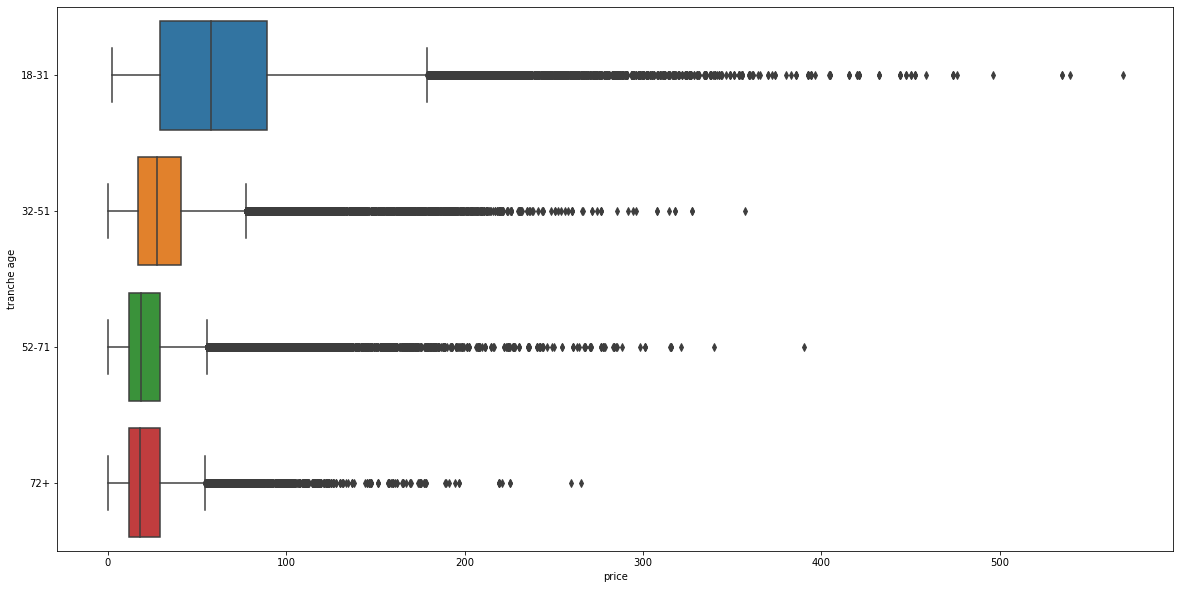

In [63]:

fig, ax=plt.subplots(figsize=(20,10))
ax=sns.boxplot(y="tranche age", x="price", data=base_panier, orient='h', order=['18-31','32-51','52-71','72+'])


<div 
    
[Retour au début de la section](#3)<br>

</div>

#### II.2.c lien entre âge et catégories

In [64]:
volume_cat_client=base_globale.groupby(['client_id','sex','age','categ'])['id_prod'].count().to_frame().reset_index()

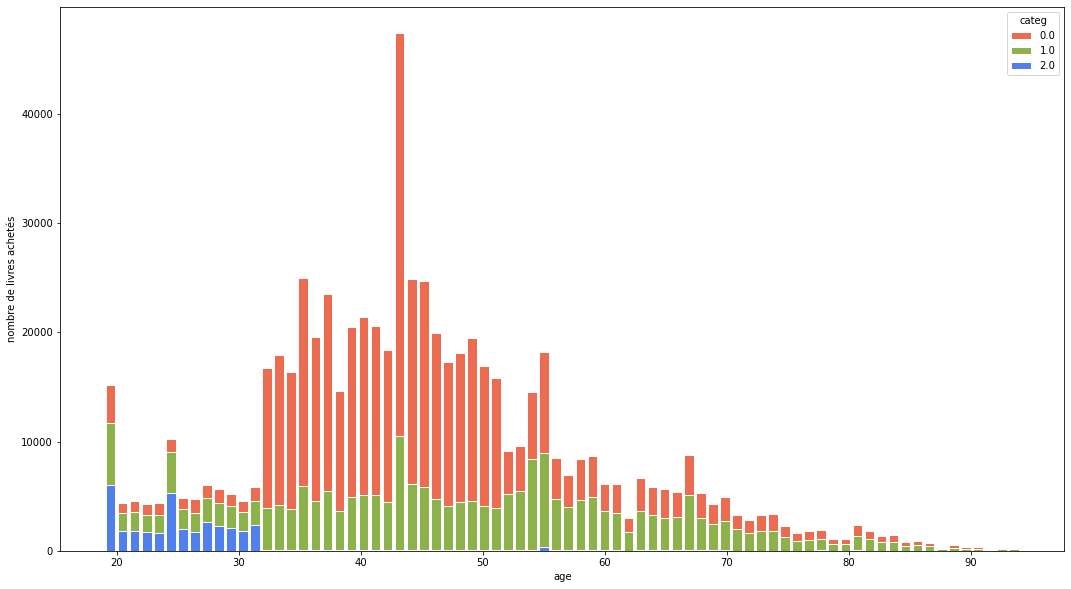

In [65]:
f, ax1 = plt.subplots( figsize=(18, 10))
sns.histplot( data=volume_cat_client, x="age",hue='categ',weights='id_prod', palette=["#E63B17",'#67990F','#1755E6'], bins=76, multiple='stack', shrink=0.8, edgecolor='white', ax=ax1)
ax1.set_ylabel('nombre de livres achetés')
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 10px">
On remarque visuellement d'après l'histogramme que la catégorie 2 est essentiellement acheté par les clients de moins de 30 ans. 


##### Vérifions si les distributions sont normales

<div class="alert alert-block alert-success" style="margin-top: 10px">
On suppose que les achats sont independants des uns des autres et que l'achat d'une catégorie n'influence pas l'achat d'une autre catégorie.

In [148]:
#moyenne et écart type empiriques de chaque distribution
moy1=np.mean(base_globale.loc[base_globale['categ']==1, 'age'])
sig1=np.std(base_globale.loc[base_globale['categ']==1, 'age'])
moy0=np.mean(base_globale.loc[base_globale['categ']==0, 'age'])
sig0=np.std(base_globale.loc[base_globale['categ']==0, 'age'])
moy2=np.mean(base_globale.loc[base_globale['categ']==2, 'age'])
sig2=np.std(base_globale.loc[base_globale['categ']==2, 'age'])

In [145]:
#Valeurs centrées réduites
cat1_CR=(base_globale.loc[base_globale['categ']==1, 'age'].to_numpy()-moy1)/sig1
cat0_CR=(base_globale.loc[base_globale['categ']==0, 'age'].to_numpy()-moy0)/sig0
cat2_CR=(base_globale.loc[base_globale['categ']==2, 'age'].to_numpy()-moy2)/sig2

In [156]:
# test de Kolmogorov smirnov pour vérifier si les distributions de la catégorie 1 et 0 sont normales.
T1,p1=kstest(cat1_CR, 'norm', alternative='two-sided', N=cat1_CR.shape[0])
T0,p0=kstest(cat0_CR, 'norm', alternative='two-sided', N=cat0_CR.shape[0])
T2,p2=kstest(cat2_CR, 'norm', alternative='two-sided', N=cat2_CR.shape[0])
print("test1:", T1, p1)
print("test0:", T0, p0)
print("test2:", T2, p2)

test1: 0.04456034096633571 0.0
test0: 0.11002366062576951 0.0
test2: 0.24912124023009963 0.0


In [160]:
#Valeur critique pour un niveau de confiance de 95%
CV1_95 = kstwo.ppf( 0.95, n=cat1_CR.shape[0])
CV0_95 = kstwo.ppf( 0.95, n=cat0_CR.shape[0])
CV2_95 = kstwo.ppf( 0.95, n=cat2_CR.shape[0])

print('valeur critique, n1 :', CV1_95)
print('valeur critique, n0 :', CV0_95)
print('valeur critique, n2 :', CV2_95)

valeur critique, n1 : 0.0028486873018025963
valeur critique, n0 : 0.0021060514970324524
valeur critique, n2 : 0.007105684046572986


<div class="alert alert-block alert-success" style="margin-top: 10px">
Nous devons rejeter avec un niveau de confiance de plus de 99% l'hypothèse que la variable age suit une distribution de type gaussienne aussi bien pour les clients achetant la catégorie 1 que ceux achetant la catégorie 2 ou la catégorie 0

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

<div class="alert alert-block alert-success" style="margin-top: 10px">
    
Nous pouvons comparer les écarts des moyennes empiriques entre la catégorie 2 et les 2 autres categories
Nous allons effectuer une regression pour mesurer l'écart entre la categorie 2 et les deux autres catégories.

In [140]:
base_cat=pd.get_dummies(data=base_globale, columns=['categ'])

In [152]:
base_cat=pd.get_dummies(data=base_globale, columns=['categ'])
Y=base_cat[['age']]
X=base_cat[['categ_0.0', 'categ_1.0']]
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results=model.fit()

In [153]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                 4.588e+04
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:19:42   Log-Likelihood:            -2.6927e+06
No. Observations:              679332   AIC:                         5.385e+06
Df Residuals:                  679329   BIC:                         5.385e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9480      0.067    403.981      0.0

<div class="alert alert-block alert-success" style="margin-top: 10px">
On voit qu'en moyenne l'age de la catégorie 2 est de 27 ans et que les clients qui achètent respectivement la catégorie 0 et un ont en moyenne 18 et 21 ans de plus que que ceux qui achètent la catégorie 2.

On voit d'après les résultats des test de Fisher et les Student test qu'on peut éliminer l'hypothèse selon laquelle tous ou un des coefficients serait nulle avec un niveau de confiance de plus de 99%. 
Cependant le coefficient de détermination n'est pas très élevé ce qui montre que le modèle appliqué n'est sans doute pas le plus pertinent et que l'hypothèse de normalité des erreurs n'est sans doute pas correcte.

<div 
    
[Retour au début de la section](#3)<br>

</div>

 ### II.3  Probabilité conditionnelle qu'un client a acheté 0_525 sachant qu'il a acheté 2_159 <a id="14"></a>

In [73]:
#identification des clients ayant acheté l'un ou l'autre des produits
base=base_globale.loc[(base_globale['id_prod']=='2_159')|(base_globale['id_prod']=='0_525')]

In [70]:
#table des fréquences sur le nouvel espace
freq_tab=pd.crosstab(base['client_id'],base['id_prod'])

In [71]:
#calcul de la probabilité conditionnelle
clients_2159=freq_tab[freq_tab['2_159']!=0]['2_159'].count()
clients_0525_and_2159=freq_tab[(freq_tab['2_159']!=0) &(freq_tab['0_525']!=0)]['2_159'].count()

P_0525_sachant_2159=clients_0525_and_2159/clients_2159
P_0525_sachant_2159

0.8660377358490566

<div class="alert alert-block alert-success" style="margin-top: 10px">

La probabilité qu'un client a acheté le produit 0_525 sachant qu'il a acheté le produit 2_159 est de 86.6 %.


<div 
    
[Retour au début de la section](#3)<br>

</div>

<div 
    
[Retour au sommaire](#0)<br>

</div>